In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, RNN, Dense, Dropout, Concatenate, SimpleRNNCell
import tensorflow as tf

In [ ]:
# # https://drive.google.com/file/d/1VTm7dxiJjp5cyiJ9TVK0LFYMCwRMbbOj/view?usp=sharing
# new_File_ID = "1SAKoTC7wIPhJm4hv8YqdcXHHV0uz5i4h"
# File_URL = "https://drive.google.com/uc?id=" + new_File_ID
# df = pd.read_csv(File_URL)

In [ ]:
df= pd.read_csv("/content/drive/MyDrive/dataset/energy/station.csv")

In [ ]:
df.head()

,Region,State,Sector,Station Type,Station,Date,Monitored CAP in MW,Generation / Today's Program,Generation / Today's Actual,Generation / FY YTD Program,Generation / FY YTD Actual,Coal Stock in Days,CAP under outage,Outage Date,Expected Date / Sync Date,Remarks
0,NORTHERN,DELHI,STATE SECTOR,THER (GT),I.P.CCPP,2020-11-17,270.0,1.75,1.00,401.75,323.43,NaN,180.0,NaN,NaN,NaN
1,NORTHERN,DELHI,STATE SECTOR,THER (GT),PRAGATI CCGT-III,2020-11-17,1500.0,10.13,11.79,2304.21,2002.30,NaN,500.0,NaN,NaN,NaN
2,NORTHERN,DELHI,STATE SECTOR,THER (GT),PRAGATI CCPP,2020-11-17,330.4,4.56,3.88,1031.60,1025.02,NaN,104.6,NaN,NaN,NaN
3,NORTHERN,DELHI,PVT SECTOR,THER (GT),RITHALA CCPP,2020-11-17,108.0,0.00,0.00,0.00,0.00,NaN,108.0,NaN,NaN,NaN
4,NORTHERN,DELHI,PVT SECTOR,THER (GT),HARYANA,2020-11-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1124889 entries, 0 to 1124888
Data columns (total 16 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   Region                        1124889 non-null  object 
 1   State                         1124889 non-null  object 
 2   Sector                        1124889 non-null  object 
 3   Station Type                  1124889 non-null  object 
 4   Station                       1124889 non-null  object 
 5   Date                          1124889 non-null  object 
 6   Monitored CAP in MW           1053219 non-null  float64
 7   Generation / Today's Program  1056194 non-null  float64
 8   Generation / Today's Actual   1056194 non-null  float64
 9   Generation / FY YTD Program   1056194 non-null  float64
 10  Generation / FY YTD Actual    1056194 non-null  float64
 11  Coal Stock in Days            264509 non-null   float64
 12  CAP under outage            

In [ ]:
# Assuming 'df' is your DataFrame and it already contains your data.

# List of columns where you want to fill NaN values with the group's mean
cols_to_fill = [
    'Monitored CAP in MW',
    'Generation / Today\'s Program',
    'Generation / Today\'s Actual',
    'Generation / FY YTD Program',
    'Generation / FY YTD Actual'
]

# Fill NaN values with the mean of their respective group defined by 'Station Type'
# for col in cols_to_fill:
#     df[col] = df.groupby('Station Type')[col].transform(lambda x: x.fillna(x.mean()))

df[cols_to_fill] = df.groupby(['State', 'Station Type'])[cols_to_fill].transform(lambda x: x.fillna(x.mean()))

In [ ]:
remove_cols = ['Region','Sector','Coal Stock in Days','Outage Date','Expected Date / Sync Date', 'Remarks']
df = df.drop(columns=remove_cols)

In [ ]:
df.describe()

,Monitored CAP in MW,Generation / Today's Program,Generation / Today's Actual,Generation / FY YTD Program,Generation / FY YTD Actual,CAP under outage
count,1.124889e+06,1.124889e+06,1.124889e+06,1.124889e+06,1.124889e+06,1.043469e+06
mean,5.569912e+02,7.332747e+00,7.141819e+00,1.370004e+03,1.315355e+03,1.647368e+02
std,6.880012e+02,1.221885e+01,1.254336e+01,2.627965e+03,2.590491e+03,3.124191e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.765000e+01,3.400000e-01,0.000000e+00,4.752000e+01,3.581000e+01,0.000000e+00
50%,2.757890e+02,1.680000e+00,1.370000e+00,2.898000e+02,2.763800e+02,0.000000e+00
75%,8.148238e+02,9.650000e+00,9.690000e+00,1.540520e+03,1.471690e+03,2.100000e+02
max,4.760000e+03,1.108700e+02,1.696810e+02,3.570000e+04,3.753912e+04,4.290000e+03


In [ ]:
df.isnull().sum()

State                               0
Station Type                        0
Station                             0
Date                                0
Monitored CAP in MW                 0
Generation / Today's Program        0
Generation / Today's Actual         0
Generation / FY YTD Program         0
Generation / FY YTD Actual          0
CAP under outage                81420
dtype: int64

In [ ]:
df.isnull().sum()

State                               0
Station Type                        0
Station                             0
Date                                0
Monitored CAP in MW                 0
Generation / Today's Program        0
Generation / Today's Actual         0
Generation / FY YTD Program         0
Generation / FY YTD Actual          0
CAP under outage                81420
dtype: int64

In [ ]:
df.head()

,State,Station Type,Station,Date,Monitored CAP in MW,Generation / Today's Program,Generation / Today's Actual,Generation / FY YTD Program,Generation / FY YTD Actual,CAP under outage
0,DELHI,THER (GT),I.P.CCPP,2020-11-17,270.0,1.750000,1.000000,401.750000,323.43000,180.0
1,DELHI,THER (GT),PRAGATI CCGT-III,2020-11-17,1500.0,10.130000,11.790000,2304.210000,2002.30000,500.0
2,DELHI,THER (GT),PRAGATI CCPP,2020-11-17,330.4,4.560000,3.880000,1031.600000,1025.02000,104.6
3,DELHI,THER (GT),RITHALA CCPP,2020-11-17,108.0,0.000000,0.000000,0.000000,0.00000,108.0
4,DELHI,THER (GT),HARYANA,2020-11-17,552.1,3.976173,3.448831,743.954788,662.74216,NaN


In [ ]:
df.shape

(1124889, 10)

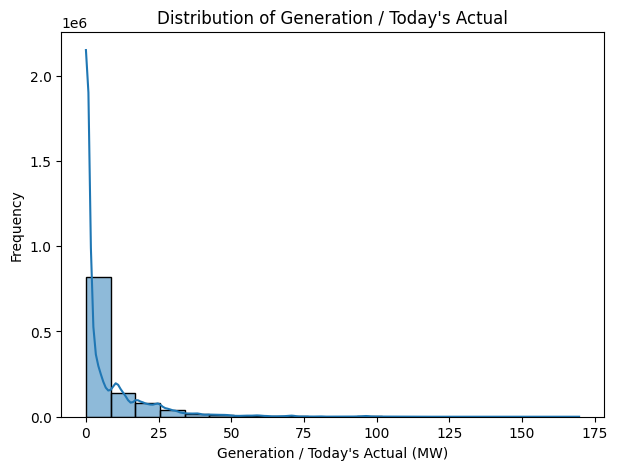

In [ ]:
plt.figure(figsize=(7, 5))
sns.histplot(df['Generation / Today\'s Actual'], bins=20, kde=True)
plt.title('Distribution of Generation / Today\'s Actual')
plt.xlabel('Generation / Today\'s Actual (MW)')
plt.ylabel('Frequency')
plt.show()

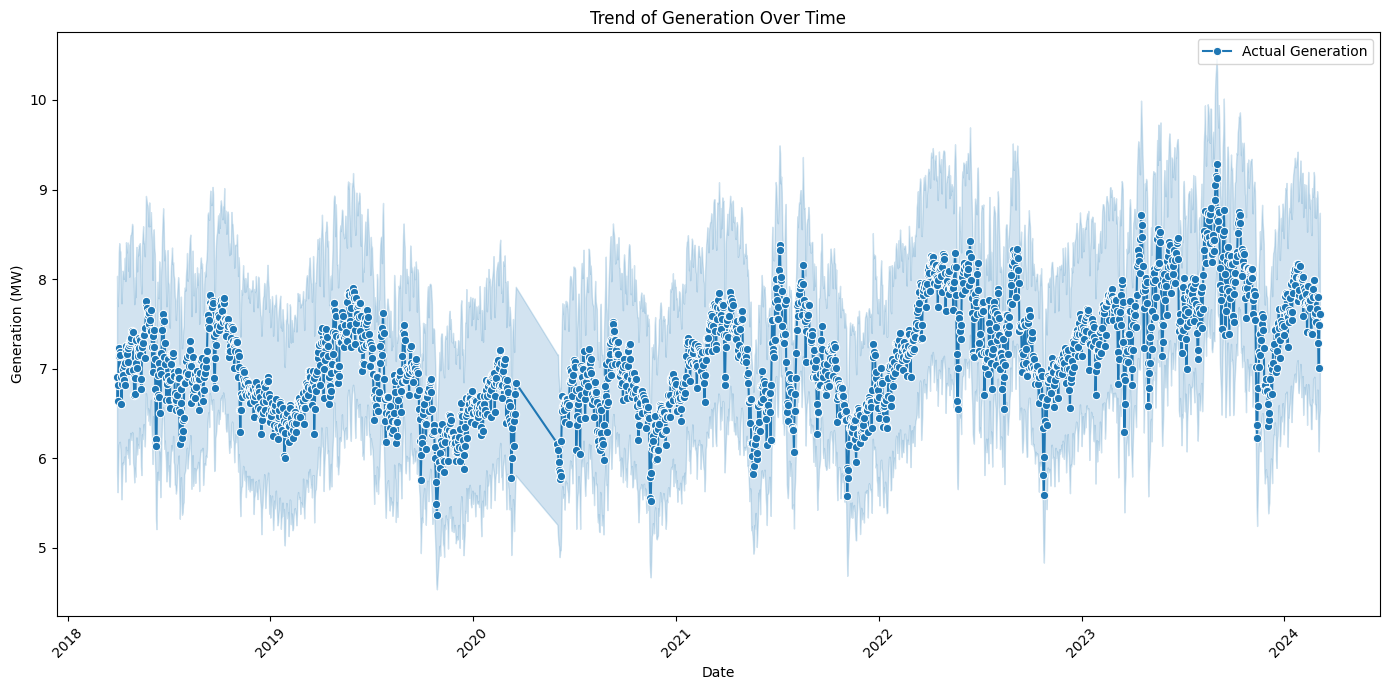

In [ ]:
# Make sure your 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort DataFrame by date
df.sort_values('Date', inplace=True)

plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='Generation / Today\'s Actual', data=df, marker='o', label='Actual Generation')
plt.title('Trend of Generation Over Time')
plt.xlabel('Date')
plt.ylabel('Generation (MW)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# start_date = df['Date'].min()
# df['Date'] = (df['Date'] - start_date).dt.days
# # df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
feature_cols = 'Date'
target_col = 'Generation / Today\'s Actual'

In [ ]:
# Split the data into features and target
X = df[feature_cols]
y = df[target_col]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# X_train_reshaped = X_train.values.reshape(-1, 1)
# X_test_reshaped = X_test.values.reshape(-1, 1)
X_train_reshaped = np.array(X_train).reshape(-1, 1)
X_test_reshaped = np.array(X_test).reshape(-1, 1)

In [ ]:
X_train_reshaped

array([['2021-02-09T00:00:00.000000000'],
       ['2023-12-04T00:00:00.000000000'],
       ['2022-05-16T00:00:00.000000000'],
       ...,
       ['2018-12-11T00:00:00.000000000'],
       ['2021-11-30T00:00:00.000000000'],
       ['2018-11-21T00:00:00.000000000']], dtype='datetime64[ns]')

In [ ]:
print("X_train_reshaped shape:", X_train_reshaped.shape)
print("X_test_reshaped shape:", X_test_reshaped.shape)

X_train_reshaped shape: (899911, 1)
X_test_reshaped shape: (224978, 1)


In [ ]:
sc = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = sc.fit_transform(X_train_reshaped)
X_test_scaled = sc.transform(X_test_reshaped)

In [ ]:
# Reshape the input data for LSTM
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

In [ ]:
from keras.metrics import MeanSquaredError
from keras.layers import Bidirectional
model = Sequential([
    Bidirectional(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))),
    Dropout(0.2),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=[MeanSquaredError()])

# Fit the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2, verbose=1)

In [ ]:
from keras.layers import Bidirectional
from keras.callbacks import EarlyStopping

regressor = Sequential()

# Adding a Bidirectional LSTM layer and some Dropout regularisation
regressor.add(Bidirectional(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1))))
regressor.add(Dropout(0.2))

# You can add more LSTM or Dense layers if necessary

# Adding the output layer
regressor.add(Dense(units=1))

# Compiling the RNN with a custom learning rate
optimizer = keras.optimizers.Adam(learning_rate=0.001)
regressor.compile(optimizer=optimizer, loss='mean_squared_error')

# Using EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the model
regressor.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping])


In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, color='blue', label='Actual')
plt.plot(y_pred, color='red', label='Predicted')
plt.title('Predicted vs Actual Values')
plt.xlabel('Index')
plt.ylabel('Generation / Today\'s Actual')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate and print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)